<a href="https://colab.research.google.com/github/krishnaaa-7/Automated-Underwriting-Platform/blob/main/automated_underwriting_platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install pytesseract opencv-python-headless transformers torch torchvision pdfplumber pillow
!apt-get install -y poppler-utils tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
poppler-utils is already the newest version (22.02.0-2ubuntu0.8).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [20]:
from google.colab import files
uploaded = files.upload()


Saving machine learning notes.pdf to machine learning notes (2).pdf


In [22]:
import pdfplumber

with pdfplumber.open("machine learning notes.pdf") as pdf:
    text = ""
    for page in pdf.pages:
        text += page.extract_text()

# Example: extract address, construction year, damages, etc.
import re
address = re.search(r'Address:\s*(.*)', text)
year_built = re.search(r'Year Built:\s*(\d{4})', text)


In [23]:
from google.colab import files
uploaded_img = files.upload()

Saving fav.jpg to fav (2).jpg


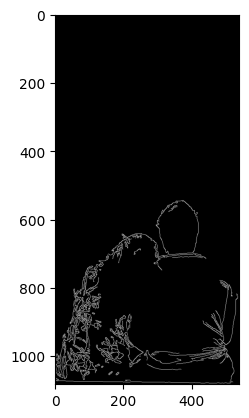

In [24]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

img = cv2.imread("fav.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Example: edge detection
edges = cv2.Canny(gray, 50, 150)
plt.imshow(edges, cmap='gray')

In [25]:
def calculate_risk(year_built, damage_score, guidelines):
    age_factor = 2025 - int(year_built)
    risk = age_factor * 0.2 + damage_score * 0.8
    return "High Risk" if risk > 7 else "Moderate Risk"


In [26]:
!pip install -q transformers torch torchvision pillow


In [27]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

# Load CLIP model and processor from Hugging Face
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


In [28]:
from google.colab import files
uploaded = files.upload()

# Load uploaded image
image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert("RGB")

# Example property conditions to match against
texts = [
    "well maintained property",
    "property with water damage",
    "cracks on the wall",
    "newly renovated house",
    "fire damage visible",
    "clean exterior"
]


Saving fav.jpg to fav (3).jpg


In [29]:
# Preprocess
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

# Get similarity scores
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)  # Convert to probabilities


In [30]:
import pandas as pd

# Create a table of probabilities for each description
probs = probs[0].cpu().numpy()
result_df = pd.DataFrame({'Text': texts, 'Probability': probs})
result_df = result_df.sort_values(by='Probability', ascending=False)

result_df.head()


,Text,Probability
2,cracks on the wall,0.888099
4,fire damage visible,0.049861
3,newly renovated house,0.041431
5,clean exterior,0.010117
1,property with water damage,0.005284


from matplotlib import pyplot as plt
_df_0['Probability'].plot(kind='hist', bins=20, title='Probability')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Probability'].plot(kind='line', figsize=(8, 4), title='Probability')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Probability', y='Text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [31]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=result_df)

https://docs.google.com/spreadsheets/d/1aWL8k-MJxKPixF7xiSK_XCO_XkW42X5HFBJxU1U43Sg/edit#gid=0


In [36]:
# === Underwriting Guidelines Logic ===
def assess_risk(year_built, image_text_match):
    age = 0  # Default age
    if year_built is not None and year_built.isdigit():
        age = 2025 - int(year_built)
    else:
        # Handle cases where year_built is not found or is not a valid digit string
        # For now, we'll treat missing or invalid year as a factor for higher risk
        age = 50 # Assign a value that would typically lead to higher risk


    damage_keywords = ["crack", "fire", "water damage", "broken", "damaged"]

    damage_flag = any(k in image_text_match.lower() for k in damage_keywords)

    if age > 30 and damage_flag:
        return "High Risk"
    elif damage_flag:
        return "Moderate Risk"
    else:
        return "Low Risk"

def guideline_check(year_built, risk):
    # Also handle the case where year_built might be None or not a valid digit string
    if year_built is not None and year_built.isdigit():
        if int(year_built) < 1995 and risk == "High Risk":
            return "Rejected"
        else:
            return "Approved"
    else:
        # If year_built is missing or invalid, and the risk is High, reject. Otherwise, approve with a warning.
        if risk == "High Risk":
             return "Rejected (Year Built Missing/Invalid)"
        else:
             return "Approved (Year Built Missing/Invalid - Further Review Recommended)"

In [37]:
# === Final Underwriting Report Output ===
from IPython.display import Markdown

# Calculate risk level and decision
# Ensure 'year_built', 'result_df', and 'assess_risk', 'guideline_check' are defined in previous cells
image_text_match = result_df['Text'].iloc[0] if not result_df.empty else ""
risk_result = assess_risk(year_built, image_text_match)
decision = guideline_check(year_built, risk_result)


Markdown(f"""
### 🧾 Underwriting Summary Report

- **Address**: {address}
- **Year Built**: {year_built}
- **Image Analysis Result**: {result_df['Text'].iloc[0]}
- **Risk Level**: `{risk_result}`
- **Decision**: **{decision}**
""")


### 🧾 Underwriting Summary Report

- **Address**: None
- **Year Built**: None
- **Image Analysis Result**: cracks on the wall
- **Risk Level**: `High Risk`
- **Decision**: **Rejected (Year Built Missing/Invalid)**
